In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rn
import matplotlib.pyplot as plt

In [2]:
def obj(x, m):
    xnorm = la.norm(x)
    
    f = xnorm**3 + m/2*xnorm**2
    return f

In [3]:
def grad(x, m):
    xnorm = la.norm(x)
    
    g = 3*xnorm*x + m*x
    return g

In [4]:
def hess(x, m):
    xnorm = la.norm(x)
    
    gf = np.eye(x.shape[0])*(m + xnorm) + 1/xnorm*np.outer(x, x)
    return gf

In [5]:
def newton(x, m):
    eta = 1
    hess_inv = la.inv(hess(x, m))
    g = grad(x,m)
    
    nstep = -np.dot(hess_inv, g)
    dec = np.dot(g, -nstep)
    
    x = x + eta*nstep
    
    return x, dec

In [6]:
def descent(update, m):
    x = np.array([1., 2., 3., 2., 1.])
    
    xstar = np.zeros(x.shape)
    T = 100
    tol = 1e-15
    error = []
    
    for t in range(T):
        x, dec = update(x, m)
        
        if(t % 1 == 0) or (t == T - 1):
            error.append(la.norm(x)**2)
        
        if dec/2 <= tol:
            return x, error, t
    
    return x, error, t

In [7]:
x0, error0, t0 = descent(newton, 0)
x1, error1, t1 = descent(newton, 1e-4)
x2, error2, t2 = descent(newton, 1e-3)
x3, error3, t3 = descent(newton, 0.1)

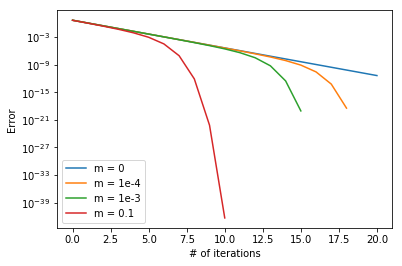

In [8]:
%matplotlib inline
plt.yscale('log')
plt.plot(error0, label="m = 0")
plt.plot(error1, label="m = 1e-4")
plt.plot(error2, label="m = 1e-3")
plt.plot(error3, label="m = 0.1")
plt.xlabel("# of iterations")
plt.ylabel("Error")
plt.legend()

$m$ is influencing the strong convexity of the function. The function is convex and so $m$ set to zero will still allow for convergence, however, as seen in the plot above, it is a linear convergence. Quadratic convergence in Netwon's method requires a strongly convex function. 

From Boyd, $||\nabla f(x)||_2 < \eta$, where in this case $\eta = \frac{m^2}{L}$. As $m$ increases, the bounds on $||\nabla f(x)||_2$ is relieved and a larger magnitude to descend can be selected.